In [ ]:
!pip install kaggle --upgrade

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devyun","key":"5e2095c648de7d03b7f05a53f92efbfa"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### LRCN (Long-term Recurrent Convolutional Network)

이 모델은 미리 훈련된 ResNet-152 (ImageNet)을 사용하여 비디오 프레임을 임베딩하고, 양방향 LSTM 레이어로 처리하여 수행된 동작의 레이블을 출력합니다.

이 모델은 CNN-RNN 프레임워크를 구현합니다.


#### 데이터 전처리
CV2를 사용하여 원본 비디오 데이터셋에서 각 비디오를 읽습니다.

비디오를 2.5 FPS로 다운샘플링합니다(args.sampling_rate로 조절 가능).

비디오에서 N 연속 프레임을 무작위 위치에서 추출합니다. 나머지는 버립니다.




In [ ]:
!git clone https://github.com/doronharitan/human_activity_recognition_LRCN.git

Cloning into 'human_activity_recognition_LRCN'...
remote: Enumerating objects: 453, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 453 (delta 95), reused 116 (delta 46), pack-reused 286
Receiving objects: 100% (453/453), 34.31 MiB | 34.11 MiB/s, done.
Resolving deltas: 100% (267/267), done.


### UCF Crie Data

ucf-crime-trimmed  

폭발 Explosion , 폭행 Assalt , 싸움 Fighting -> Anormal

In [ ]:
# !kaggle datasets download -d alirakhmaev/ucf-crime-full
# !kaggle datasets download -d avijitpaulavi/ucf-crime-trimmed
!kaggle datasets download -d tesisjulinwilson/ucf-crimes-dataset

100% 4.20G/4.21G [00:17<00:00, 270MB/s]
100% 4.21G/4.21G [00:17<00:00, 259MB/s]


In [ ]:
import zipfile
import os

# 압축 해제할 파일의 경로와 압축 해제될 폴더의 경로
zip_file_path = "./ucf-crimes-dataset.zip"
extracted_folder = "./ucf-crimes-dataset"

# ZIP 파일 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# 압축 해제된 폴더 목록 출력
extracted_folders = os.listdir(extracted_folder)
print("압축 해제된 폴더 목록:")
for idx, folder in enumerate(extracted_folders):
    print(f"{idx + 1}: {folder}")

압축 해제된 폴더 목록:
1: UCFcrimes


### mp4 -> avi 형식으로 변환

In [ ]:
import os
import subprocess
from tqdm.auto import tqdm

def convert_mp4_to_avi(input_path, output_path):
    """
    Convert MP4 files to AVI format using FFmpeg.

    Args:
        input_path (str): Path to the directory containing MP4 files.
        output_path (str): Path to the directory where AVI files will be saved.
    """
    os.makedirs(output_dir, exist_ok=True)
    dir_list = os.listdir(input_path)
    for dir in dir_list:
      video_path = os.path.join(input_path, dir)

      if dir == 'Fight':
        class_name = 'Anomaly'
      else:
        class_name ='Normal'

      class_output_dir = os.path.join(output_dir, class_name)
      os.makedirs(class_output_dir, exist_ok=True)

      mp4_files = [file for file in os.listdir(video_path) if file.endswith('.mp4')]
      for mp4_file in tqdm(mp4_files):
          input_file_path = os.path.join(video_path, mp4_file)
          output_file_path = os.path.join(class_output_dir, mp4_file.replace('.mp4', '.avi'))

          command = ["ffmpeg", "-i", input_file_path, output_file_path]
          subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)



In [ ]:
input_dir = "/content/ucf-crimes-dataset/UCFcrimes"
output_dir = "/content/ucf-crimes-dataset-avi"
convert_mp4_to_avi(input_dir, output_dir)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
import os
import subprocess

def convert_mp4_to_avi(input_path, output_path, class_list):
    """
    Convert MP4 files to AVI format using FFmpeg.

    Args:
        input_path (str): Path to the directory containing MP4 files.
        output_path (str): Path to the directory where AVI files will be saved.
    """
    os.makedirs(output_dir, exist_ok=True)
    part_dirs = [part for part in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, part))]

    for part in part_dirs:
        part_path = os.path.join(input_dir, part)
        print('part:', part)

        if part.startswith("Normal"):
            class_input_dir = part_path
            class_output_dir = os.path.join(output_dir, 'Normal')
            os.makedirs(class_output_dir, exist_ok=True)
            mp4_files = [file for file in os.listdir(class_input_dir) if file.endswith('.mp4')]
            for mp4_file in mp4_files:
                input_file_path = os.path.join(class_input_dir, mp4_file)
                output_file_path = os.path.join(class_output_dir, mp4_file.replace('.mp4', '.avi'))

                command = ["ffmpeg", "-i", input_file_path, output_file_path]
                subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        else:
            class_dirs = [class_dir for class_dir in os.listdir(part_path) if os.path.isdir(os.path.join(part_path, class_dir))]

            for class_dir in class_dirs:
                if class_dir in class_list:
                    class_input_dir = os.path.join(input_dir, part, class_dir)
                    class_output_dir = os.path.join(output_dir, class_dir)
                else:
                    continue

                print(class_output_dir)

                os.makedirs(class_output_dir, exist_ok=True)

                mp4_files = [file for file in os.listdir(class_input_dir) if file.endswith('.mp4')]
                for mp4_file in mp4_files:
                    input_file_path = os.path.join(class_input_dir, mp4_file)
                    output_file_path = os.path.join(class_output_dir, mp4_file.replace('.mp4', '.avi'))

                    command = ["ffmpeg", "-i", input_file_path, output_file_path]
                    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)


    # class_dirs = [class_dir for class_dir in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, class_dir))]

    # for class_dir in class_dirs:
    #     class_input_dir = os.path.join(input_dir, class_dir)
    #     class_output_dir = os.path.join(output_dir, class_dir)
    #     os.makedirs(class_output_dir, exist_ok=True)

    #     mp4_files = [file for file in os.listdir(class_input_dir) if file.endswith('.mp4')]

    #     for mp4_file in mp4_files:
    #         input_file_path = os.path.join(class_input_dir, mp4_file)
    #         output_file_path = os.path.join(class_output_dir, mp4_file.replace('.mp4', '.avi'))

    #         command = ["ffmpeg", "-i", input_file_path, output_file_path]
    #         subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)


In [ ]:
# input_dir = "/content/ucf_crime_trimmed/Anomaly_Dataset/Anomaly_Videos"
# output_dir = "/content/ucf_crime_trimmed_avi"
# class_list = ['Explosion' , 'Assault' , 'Fighting']
# convert_mp4_to_avi(input_dir, output_dir, class_list)

### txt파일 데이터 생성

In [ ]:
import os

# base_path = '/content/ucf_crime_full_avi'
base_path = '/content/ucf-crimes-dataset-avi'

save_path = "/content/data_split_list"

label_list_path = os.path.join(save_path, "label_list")
file_path = os.path.join(label_list_path, "classInd.txt")  # 클래스 정보를 저장할 파일 경로

os.makedirs(label_list_path, exist_ok=True)

# 클래스 정보 생성 및 저장
class_info = os.listdir(base_path)
class_info = [c for c in class_info if c != 'label_list' and 'checkpoints' not in c]

with open(file_path, "w") as file:
    for idx, class_name in enumerate(class_info, start=1):
        file.write(f"{idx} {class_name}\n")




In [ ]:
class_mapping_file = '/content/data_split_list/label_list/classInd.txt'
class_mapping = {}

with open(class_mapping_file, "r") as file:
    for line in file:
        parts = line.strip().split(' ', 1)
        if len(parts) == 2:
            idx, class_name = parts
            class_mapping[int(idx)] = class_name

# 클래스 매핑 정보 출력
for idx, class_name in class_mapping.items():
    print(f"{idx}: {class_name}")

1: Anomaly
2: Normal


In [ ]:
import random

# base_path = "/content/ucf_crime_full_avi"
base_path = '/content/ucf-crimes-dataset-avi'
save_path = '/content/data_split_list/label_list'

# test와 train 데이터 비율 설정
test_ratio = 0.2

test_data = []
train_data = []

for idx, class_name in class_mapping.items():
    class_path = os.path.join(base_path, class_name)
    videos = [video for video in os.listdir(class_path) if video.endswith('.avi')]
    # random.shuffle(videos)  # 데이터 순서를 무작위로 섞음
    split_idx = int(len(videos) * test_ratio)
    test_data.extend([os.path.join(class_name, video) for video in videos[:split_idx]])
    train_data.extend([os.path.join(class_name, video) + f" {idx}" for video in videos[split_idx:]])

# testlist와 trainlist 파일 작성
with open(os.path.join(save_path, "testlist01.txt"), "w") as test_file:
    test_file.write("\n".join(test_data))

with open(os.path.join(save_path, "trainlist01.txt"), "w") as train_file:
    train_file.write("\n".join(train_data))



### 비디오 데이터 전처리

In [ ]:
cd /content/human_activity_recognition_LRCN/

/content/human_activity_recognition_LRCN


In [ ]:
!python preprocessing_data/preprocessing_data.py --row_data_dir /content/ucf-crimes-dataset-avi \
                             --ucf_list_dir /content/data_split_list/label_list \
                             --dataset UCF101

100% 80/80 [00:01<00:00, 46.38it/s]
100% 320/320 [00:06<00:00, 49.50it/s]


In [ ]:
!pip install sk-video

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.2 MB/s eta 0:00:00




```
--epochs                    100         
--batch-size                32
--lr                        5e-4
-num_workers                4
--split_size                0.2         #set the size of the split between validation data and train data
--num_frames_video          5           #the number of frames we have in the input video
--seed                      42
--load_all_data_to_RAM      False       #load dataset directly to the RAM, for faster computation. usually use when the num of class is small and we want to debug the code
--latent_dim                512
--hidden_size               256         #LSTM hidden size
--lstm_layers               2
--bidirectional             True
--open_new_folder           'True’      #open a new folder where all of the run data would be saved at                    
--load_checkpoint           False
--checkpoint_path           ''
--checkpoint_interval       5
--val_check_interval        5           #Interval between running validation test
--local_dir                 os.getcwd()
--number_of_classes         None        #The number of classes we would train on. From the total 101 classes
```



In [ ]:
import shutil

def delete_directory_contents(directory_path):
    """
    Delete all contents (files and subdirectories) of the given directory.

    Args:
        directory_path (str): Path to the directory whose contents will be deleted.
    """
    try:
        shutil.rmtree(directory_path)
        print(f"Contents of directory '{directory_path}' deleted.")
    except OSError as e:
        print(f"Error deleting contents of directory '{directory_path}': {e}")


In [ ]:
cd /content/human_activity_recognition_LRCN

/content/human_activity_recognition_LRCN


### Train

In [ ]:
!python LRCN/train.py --sampled_data_dir "/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_5" \
--ucf_list_dir /content/data_split_list/label_list

2023-09-07 07:06:35.604904: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 07:06:36.558224: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The setting of the run are:
Namespace(epochs=50, batch_size=16, lr=0.0005, num_workers=4, split_size=0.2, sampled_data_dir='/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_5', ucf_list_dir='/content/data_split_list/label_list', num_frames_video=5, seed=42, load_all_data_to_RAM=False, latent_dim=512, hidden_size=256, lstm_layers=2, bidirectional=True, open_new_folder='True', load_checkpoint=False, checkpoint_path='', checkpoint_interval=5, val_check_interval=5, local_dir='/content/human_activity_recognition_LRCN', number_of_classes=14

### Test

In [ ]:
cd /content/human_activity_recognition_LRCN/

/content/human_activity_recognition_LRCN


In [ ]:
!python LRCN/test.py --ucf_list_dir /content/data_split_list/label_list \
                 --model_dir /content/human_activity_recognition_LRCN/20230907-070637/Saved_model_checkpoints \
                 --model_name epoch_40.pth.tar

2023-09-07 08:05:26.492696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 08:05:27.369190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The setting of the run are:
Namespace(epochs=50, batch_size=16, lr=0.0005, num_workers=4, split_size=0.2, sampled_data_dir='/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_5', ucf_list_dir='/content/data_split_list/label_list', num_frames_video=5, seed=42, load_all_data_to_RAM=False, latent_dim=512, hidden_size=256, lstm_layers=2, bidirectional=True, open_new_folder='True', load_checkpoint=False, checkpoint_path='', checkpoint_interval=5, val_check_interval=5, local_dir='/content/human_activity_recognition_LRCN', number_of_classes=14

In [ ]:
import os
import subprocess

def convert_avi_to_mp4(input_path, output_path):
    os.makedirs(output_path, exist_ok=True)

    avi_files = [file for file in os.listdir(input_path) if file.endswith('.avi')]

    for avi_file in avi_files:
      print(avi_file)
      input_file_path = os.path.join(input_path, avi_file)
      output_file_path = os.path.join(output_path, avi_file.replace('.avi', '.mp4'))

      command = ["ffmpeg", "-i", input_file_path, output_file_path]
      subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)


In [ ]:
avi_input_path = "/content/human_activity_recognition_LRCN/20230907-070637/test/Videos"
mp4_output_path = "/content/test_video"

# AVI 파일을 MP4로 변환
convert_avi_to_mp4(avi_input_path, mp4_output_path)

Normal_Videos117_x264.avi
Normal_Videos383_x264.avi
Assault041_x264.avi
Normal_Videos265_x264.avi
Normal_Videos355_x264.avi
Normal_Videos416_x264.avi
Normal_Videos444_x264.avi
Abuse045_x264.avi
Normal_Videos218_x264.avi
Abuse014_x264.avi
Fighting030_x264.avi
Normal_Videos433_x264.avi
Abuse034_x264.avi
Normal_Videos204_x264.avi
Fighting033_x264.avi
Assault026_x264.avi


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

def play_video(file_path):
    video_data = open(file_path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(video_data).decode()
    display(HTML("""
    <video width=500 controls>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url))



In [ ]:
video_file_path = "/content/test_video/Assault041_x264.mp4"
play_video(video_file_path)


In [ ]:
video_file_path = "/content/ucf_crime_full/Arrest/Arrest023_x264.mp4"
play_video(video_file_path)

Output hidden; open in https://colab.research.google.com to view.

### 프레임수 늘려서 재학습

- video_width : 320.0
- video_height:  240.0
- fps 30

In [ ]:
!python preprocessing_data/preprocessing_data.py --row_data_dir /content/ucf-crimes-dataset-avi \
                             --ucf_list_dir /content/data_split_list/label_list \
                             --dataset UCF101 \
                             --num_frames_to_extract 15

100% 80/80 [00:04<00:00, 16.01it/s]
100% 320/320 [00:18<00:00, 16.92it/s]


In [ ]:
!python LRCN/train.py --sampled_data_dir '/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_20' \
--ucf_list_dir /content/data_split_list/label_list \
--num_frames_video 10

2023-09-07 08:13:05.497658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 08:13:06.401138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The setting of the run are:
Namespace(epochs=50, batch_size=16, lr=0.0005, num_workers=4, split_size=0.2, sampled_data_dir='/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_20', ucf_list_dir='/content/data_split_list/label_list', num_frames_video=10, seed=42, load_all_data_to_RAM=False, latent_dim=512, hidden_size=256, lstm_layers=2, bidirectional=True, open_new_folder='True', load_checkpoint=False, checkpoint_path='', checkpoint_interval=5, val_check_interval=5, local_dir='/content/human_activity_recognition_LRCN', number_of_classes=

In [ ]:
%load_ext tensorboard
!tensorboard --logdir {'/content/human_activity_recognition_LRCN/20230830-050104/train_val_accuracy_train_accuracy/'} --load_fast=false


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2023-08-30 06:37:38.491392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 06:37:39.341333: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-30 06:37:40.749293: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-30 06:37:40.781193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read

In [ ]:
!python LRCN/test.py --ucf_list_dir /content/data_split_list/label_list \
                 --model_dir /content/human_activity_recognition_LRCN/20230907-081307/Saved_model_checkpoints \
                 --model_name epoch_40.pth.tar

2023-09-07 09:38:22.452294: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 09:38:23.320716: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The setting of the run are:
Namespace(epochs=50, batch_size=16, lr=0.0005, num_workers=4, split_size=0.2, sampled_data_dir='/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_20', ucf_list_dir='/content/data_split_list/label_list', num_frames_video=5, seed=42, load_all_data_to_RAM=False, latent_dim=512, hidden_size=256, lstm_layers=2, bidirectional=True, open_new_folder='True', load_checkpoint=False, checkpoint_path='', checkpoint_interval=5, val_check_interval=5, local_dir='/content/human_activity_recognition_LRCN', number_of_classes=1

### TEST2

In [ ]:
avi_input_path = "/content/human_activity_recognition_LRCN/20230907-081307/test/Videos"
mp4_output_path = "/content/test_video_fin"

# AVI 파일을 MP4로 변환
convert_avi_to_mp4(avi_input_path, mp4_output_path)

Robbery092_x264.avi
Normal_Videos265_x264.avi
Normal_Videos435_x264.avi
Abuse032_x264.avi
Normal_Videos173_x264.avi
Normal_Videos218_x264.avi
Robbery041_x264.avi
Fighting033_x264.avi
Normal_Videos148_x264.avi
Normal_Videos237_x264.avi
Normal_Videos202_x264.avi
Robbery123_x264.avi
Robbery083_x264.avi
Fighting051_x264.avi
Assault015_x264.avi
Fighting037_x264.avi


In [ ]:
video_file_path = "/content/test_video_fin/Robbery123_x264.mp4"
play_video(video_file_path)

### anomaly : normal 클래스 정리

In [ ]:
import os
import subprocess

def convert_mp4_to_avi_anormal(input_path, output_path, class_list):
    os.makedirs(output_dir, exist_ok=True)
    part_dirs = [part for part in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, part))]

    for part in part_dirs:
        part_path = os.path.join(input_dir, part)
        print('part:', part)

        if part.startswith("Normal"):
            class_input_dir = part_path
            class_output_dir = os.path.join(output_dir, 'Normal')
            os.makedirs(class_output_dir, exist_ok=True)
            mp4_files = [file for file in os.listdir(class_input_dir) if file.endswith('.mp4')]
            for mp4_file in mp4_files:
                input_file_path = os.path.join(class_input_dir, mp4_file)
                output_file_path = os.path.join(class_output_dir, mp4_file.replace('.mp4', '.avi'))

                command = ["ffmpeg", "-i", input_file_path, output_file_path]
                subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        else:
            class_dirs = [class_dir for class_dir in os.listdir(part_path) if os.path.isdir(os.path.join(part_path, class_dir))]

            for class_dir in class_dirs:
                if class_dir in class_list:
                    class_input_dir = os.path.join(input_dir, part, class_dir)
                    class_output_dir = os.path.join(output_dir, 'Anomaly')
                else:
                    continue

                print(class_output_dir)

                os.makedirs(class_output_dir, exist_ok=True)

                mp4_files = [file for file in os.listdir(class_input_dir) if file.endswith('.mp4')]
                for mp4_file in mp4_files:
                    input_file_path = os.path.join(class_input_dir, mp4_file)
                    output_file_path = os.path.join(class_output_dir, mp4_file.replace('.mp4', '.avi'))

                    command = ["ffmpeg", "-i", input_file_path, output_file_path]
                    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)


In [ ]:
input_dir = "/content/ucf_crime_trimmed/Anomaly_Dataset/Anomaly_Videos"
output_dir = "/content/ucf_crime_trimmed_avi"
class_list = ['Explosion' , 'Assault' , 'Fighting']
convert_mp4_to_avi_anormal(input_dir, output_dir, class_list)

part: Anomaly-Videos-Part-2
/content/ucf_crime_trimmed_avi/Anomaly
/content/ucf_crime_trimmed_avi/Anomaly
part: Anomaly-Videos-Part-1
/content/ucf_crime_trimmed_avi/Anomaly
part: Normal-Videos-Part-1


In [ ]:
delete_directory_contents('/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_20')


Contents of directory '/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_20' deleted.


### 데이터 전처리

In [ ]:
!python preprocessing_data/preprocessing_data.py --row_data_dir /content/ucf_crime_trimmed_avi \
                             --ucf_list_dir /content/data_split_list/label_list \
                             --dataset UCF101 \
                             --num_frames_to_extract 20

100% 47/47 [00:03<00:00, 12.29it/s]
100% 191/191 [00:15<00:00, 12.17it/s]


### 모델 학습

In [ ]:
# 20230830-065717
!python LRCN/train.py --sampled_data_dir "/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_20" \
--ucf_list_dir /content/data_split_list/label_list \
--num_frames_video 15

2023-08-30 06:57:15.110811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 06:57:16.041785: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The setting of the run are:
Namespace(epochs=50, batch_size=16, lr=0.0005, num_workers=4, split_size=0.2, sampled_data_dir='/content/UCF101_sampled_data_video_sampling_rate_10_num frames extracted_20', ucf_list_dir='/content/data_split_list/label_list', num_frames_video=15, seed=42, load_all_data_to_RAM=False, latent_dim=512, hidden_size=256, lstm_layers=2, bidirectional=True, open_new_folder='True', load_checkpoint=False, checkpoint_path='', checkpoint_interval=5, val_check_interval=5, local_dir='/content/human_activity_recognition_LRCN', number_of_

In [ ]:
!python LRCN/test.py --ucf_list_dir /content/data_split_list/label_list \
                 --model_dir /content/human_activity_recognition_LRCN/20230830-065717/Saved_model_checkpoints \
                 --model_name epoch_25.pth.tar

2023-08-30 08:14:31.916806: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 08:14:32.795085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The setting of the run are:
Namespace(epochs=50, batch_size=16, lr=0.0005, num_workers=4, split_size=0.2, sampled_data_dir='C:\\Users\\Doron\\Desktop\\ObjectRecognition data\\UCF101_sampled_data_video_sampling_rate_10_num frames extracted_5', ucf_list_dir='/content/data_split_list/label_list', num_frames_video=5, seed=42, load_all_data_to_RAM=False, latent_dim=512, hidden_size=256, lstm_layers=2, bidirectional=True, open_new_folder='True', load_checkpoint=False, checkpoint_path='', checkpoint_interval=5, val_check_interval=5, local_dir='/content/huma

In [ ]:
avi_input_path = "/content/human_activity_recognition_LRCN/20230830-065717/test/Videos"
mp4_output_path = "/content/test_video3"

# AVI 파일을 MP4로 변환
convert_avi_to_mp4(avi_input_path, mp4_output_path)

Assault006_x264.avi
Explosion018_x264.avi
Assault039_x264.avi
Explosion034_x264.avi
Normal_Videos_801_x264.avi
Explosion029_x264.avi
Normal_Videos_696_x264.avi
Normal_Videos_168_x264.avi
Normal_Videos_891_x264_2.avi
Normal_Videos_686_x264.avi
Assault041_x264.avi
Normal_Videos_576_x264.avi
Assault018_x264.avi
Normal_Videos_033_x264.avi
Assault051_x264.avi


In [ ]:
video_file_path = "/content/test_video3/Assault006_x264.mp4"
play_video(video_file_path)

In [ ]:
video_file_path = "/content/test_video3/Normal_Videos_033_x264.mp4"
play_video(video_file_path)

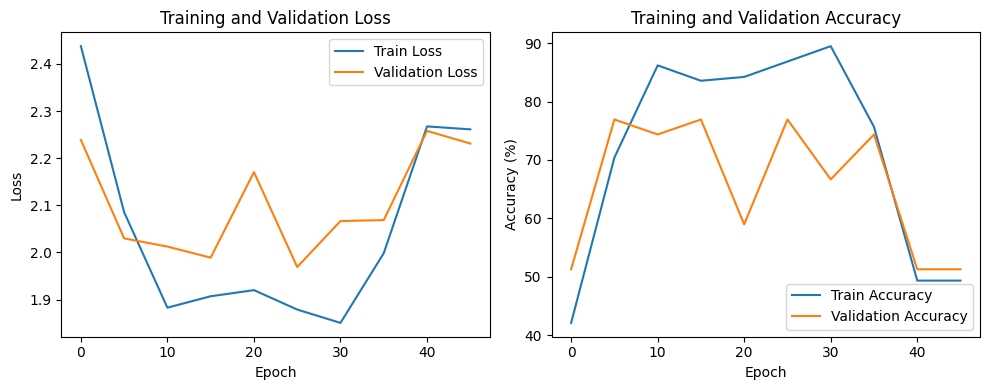

In [ ]:
import matplotlib.pyplot as plt

# 학습 과정에서 기록한 손실과 정확도 데이터
epochs = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
train_loss = [2.43756211, 2.08527976, 1.88277869, 1.90699823, 1.91998825, 1.87876837, 1.85049585, 1.99832522, 2.26733441, 2.26107810]
train_acc = [42.1053, 70.3947, 86.1842, 83.5526, 84.2105, 86.8421, 89.4737, 75.6579, 49.3421, 49.3421]
val_loss = [2.23868203, 2.02975301, 2.01238473, 1.98888079, 2.17041938, 1.96900058, 2.06656003, 2.06856656, 2.25780956, 2.23102228]
val_acc = [51.2821, 76.9231, 74.3590, 76.9231, 58.9744, 76.9231, 66.6667, 74.3590, 51.2821, 51.2821]

# 손실 그래프
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


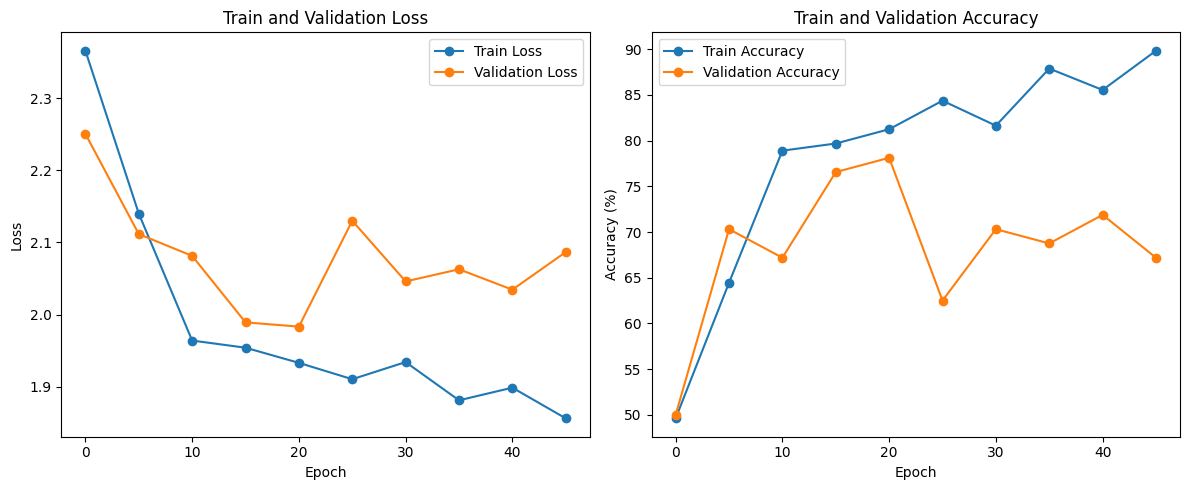

In [ ]:
import matplotlib.pyplot as plt

# 에포크 및 손실/정확도 데이터
epochs = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
train_loss = [2.36581710, 2.13992158, 1.96390991, 1.95398507, 1.93297822, 1.91029198, 1.93408154, 1.88104718, 1.89856837, 1.85604212]
train_acc = [49.6094, 64.4531, 78.9062, 79.6875, 81.2500, 84.3750, 81.6406, 87.8906, 85.5469, 89.8438]
val_loss = [2.25049406, 2.11156315, 2.08130080, 1.98911667, 1.98322839, 2.13004082, 2.04591325, 2.06274474, 2.03444740, 2.08660609]
val_acc = [50.0000, 70.3125, 67.1875, 76.5625, 78.1250, 62.5000, 70.3125, 68.7500, 71.8750, 67.1875]

# 손실 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
